In [1]:
import os
import random
import numpy as np
import tensorflow as tf;
import matplotlib.pyplot as plt
from tqdm import *
from ocr_model import *
from image_utils import *
from random import randint
from training_set_utils import *
from PIL import Image, ImageEnhance, ImageOps

Using TensorFlow backend.


In [2]:
model = OcrModel()
model.load_weights()

loading 1620239947_weights_28x28_c11_acc1.0.h5


In [8]:
%matplotlib inline
data_set = create_from_labeled_dir("images/labeled/")
data_set = letterbox_resize(data_set, 30, 42)
data_set = create_inverted_images(data_set)
data_set = equalize_classes(data_set)
data_set = create_brightness_variations(data_set, 0.6, 1.5)

create_brightness_variations:  19%|█▉        | 4636/24607 [00:00<00:01, 13840.46it/s][2015, 1202, 2024, 2042, 1926, 1799, 1742, 2106, 2237, 1968, 732]
[2237, 2237, 2237, 2237, 2237, 2237, 2237, 2237, 2237, 2237, 2237]
create_brightness_variations: 100%|██████████| 24607/24607 [00:01<00:00, 24507.27it/s]


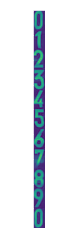

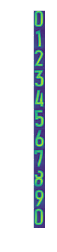

In [21]:
%matplotlib inline
atlas_data_set = create_from_atlas_dir("images/atlas/", 24, 40)

In [22]:
%matplotlib inline
atlas_data_set = create_variations(atlas_data_set)
data_set = data_set + atlas_data_set
atlas_data_set = None

100%|██████████| 800/800 [01:49<00:00,  7.30it/s]


In [9]:
%matplotlib inline

random.shuffle(data_set)

num_test_data = 1000
test_set = data_set[:num_test_data]
test_xy = model.convert_data_set(test_set)

train_set = data_set[num_test_data:]
train_xy = model.convert_data_set(train_set)

train_set = None
data_set = None

100%|██████████| 23607/23607 [00:02<00:00, 10650.74it/s]


In [10]:
from keras.preprocessing.image import ImageDataGenerator
import time
import math

use_generator = False
batch_size = 4 * 1024

gen = ImageDataGenerator(
        width_shift_range=3, 
        height_shift_range=3, 
        zoom_range=0.1, 
        horizontal_flip=False)
        #rotation_range=10,
        #brightness_range=[0.5, 1.0])

last = time.time()
for i in range(99999):

    #use_generator = i % 2 == 1

    if use_generator:        
        model.cnn.fit_generator(gen.flow(
            train_xy[0], train_xy[1],
            batch_size=batch_size, shuffle=True), epochs=50, workers=24, steps_per_epoch=math.ceil(len(train_xy[0]) / batch_size))
    else:
        model.cnn.fit(
            train_xy[0], train_xy[1],
            epochs=50,
            batch_size=batch_size)

    now = time.time()
    if now - last > 300:
        last = now
        loss_acc = model.cnn.evaluate(test_xy[0], test_xy[1],batch_size=batch_size)    
        model.save_weights("acc" + str(loss_acc[1]))

Train on 23607 samples
Epoch 1/50
23607/23607 [==============================] - 0s 11us/sample - loss: 0.0353 - acc: 0.9894
Epoch 2/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0305 - acc: 0.9904
Epoch 3/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0331 - acc: 0.9908
Epoch 4/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0311 - acc: 0.9907
Epoch 5/50
23607/23607 [==============================] - 0s 10us/sample - loss: 0.0268 - acc: 0.9913
Epoch 6/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0277 - acc: 0.9923
Epoch 7/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0302 - acc: 0.9911
Epoch 8/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0297 - acc: 0.9912
Epoch 9/50
23607/23607 [==============================] - 0s 9us/sample - loss: 0.0299 - acc: 0.9914
Epoch 10/50
23607/23607 [==============================] - 0s 9us/

KeyboardInterrupt: 

correct: False; expected: (6, 0) (1.0, 0.0); predicted: (10, 6) (0.73, 0.13)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


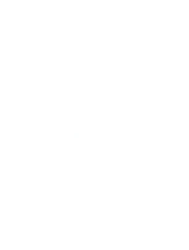

correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 9) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 7) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0

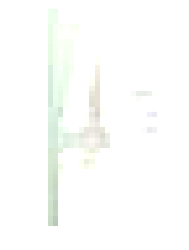

correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 4) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 4) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 6) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); 

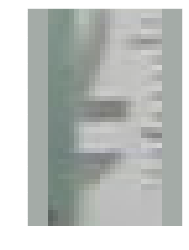

correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: False; expected: (10, 0) (1.0, 0.0); predicted: (4, 10) (0.55, 0.4)
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


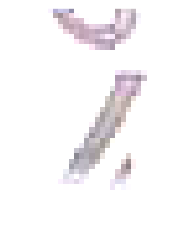

correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (0.94, 0.06)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (0.84, 0.15)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.

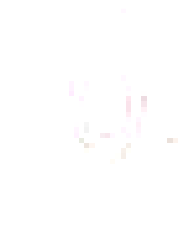

correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 9) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 6) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.

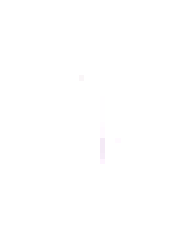

correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 7) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 1) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 0) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 10) (1.0, 0.0)
correct: False; expected: (6, 0) (1.0,

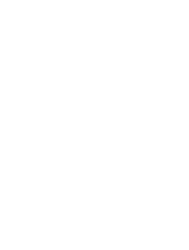

correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.

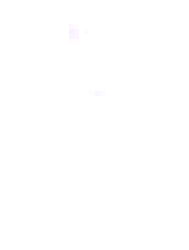

correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (0.88, 0.12)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 

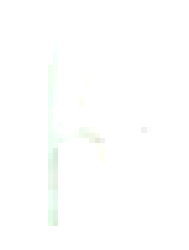

correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 1) (0.83, 0.09)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 6) (0.64, 0.24)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (7, 0) (1

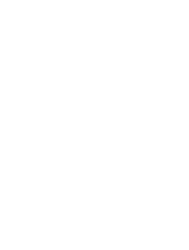

correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 9) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 10) (1.0, 0.0)
correct: True; expected: (9, 0) (1.0, 0.0); predicted: (9, 10) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (8, 0) (1.0, 0.0); predicted: (8, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (10, 0) (1.0, 0.0); predicted: (10, 0) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 

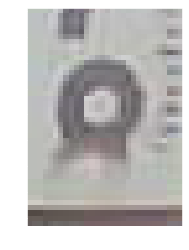

correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 5) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (1, 0) (1.0, 0.0); predicted: (1, 10) (1.0, 0.0)
correct: True; expected: (6, 0) (1.0, 0.0); predicted: (6, 10) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0); predicted: (0, 10) (1.0, 0.0)
correct: True; expected: (2, 0) (1.0, 0.0); predicted: (2, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (4, 0) (1.0, 0.0); predicted: (4, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (5, 0) (1.0, 0.0); predicted: (5, 3) (1.0, 0.0)
correct: True; expected: (7, 0) (1.0, 0.0); predicted: (7, 2) (1.0, 0.0)
correct: True; expected: (3, 0) (1.0, 0.0); predicted: (3, 10) (1.0, 0.0)
correct: True; expected: (0, 0) (1.0, 1.0);

KeyboardInterrupt: 

In [7]:
def argmax2(arr):
    idx0 = 0
    last_max = 0.0
    for i in range(len(arr)):
        if arr[i] > last_max:
            last_max = arr[i]
            idx0 = i    
    idx1 = 0
    last_max = 0.0
    for i in range(len(arr)):
        if i != idx0 and arr[i] > last_max:
            last_max = arr[i]
            idx1 = i
    return (idx0, idx1)

def confidence(arr, pred):
    conv0 = arr[pred[0]]
    conv1 = arr[pred[1]]
    return (round(conv0, 2), round(conv1, 2))

def predict(img):
    result = model.predict(img)
    pred = argmax2(result)
    return (pred, confidence(result, pred))

def predict_test(idx):
    result = predict(test_set[idx].image)
    pred = result[0]
    conf = result[1]
    expect = argmax2(test_set[idx].y)
    expect_conf = confidence(test_set[idx].y, expect)
    if expect_conf[0] > 0.6:
        correct = expect[0] == pred[0]
        print("correct: " + str(correct) + 
              "; expected: " + str(expect) + " " + str(expect_conf) +
              "; predicted: " + str(pred) + " " + str(conf))
        if not correct: # or convidence < 0.9:
            test_set[idx].show()
            #plt.imshow(x_test[idx])
            #plt.show()
    else:
        print("skip")
for i in range(len(test_set)):
    predict_test(i)

In [3]:
model.save_weights()

model.export_as_tflite()

writing ocr_model_28x28_c11.tflite
TODO call in git bash: xxd -i ocr_model_28x28_c11.tflite > ../src/ocr_model_28x28_c11.c
